In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, Math


In [10]:
from keras.datasets import fashion_mnist


# Про dataset `fassion-mnist`

Fashion-MNIST — це набір зображень статей Zalando, що складається з навчального набору з 60 000 прикладів і тестового набору з 10 000 прикладів. Кожен приклад являє собою зображення в градаціях сірого 28x28, пов'язане з міткою з 10 класів:

| Мітка | Опис        | Переклад         |
|-------|-------------|------------------|
| 0     | T-shirt/top | Футболка/сорочка |
| 1     | Trouser     | Штани            |
| 2     | Pullover    | Светр            |
| 3     | Dress       | Плаття           |
| 4     | Coat        | Пальто           |
| 5     | Sandal      | Сандалі          |
| 6     | Shirt       | Сорочка          |
| 7     | Sneaker     | Кросовки         |
| 8     | Bag         | Сумка            |
| 9     | Ankle boot  | Чоботи           |

# Константи

In [11]:
class_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
input_shape = (28, 28, 1)
num_classes = 10


# Підготовка навчального та тестового наборів

In [12]:
# Завантажуємо датасет і розділимо його на навчальну та тестову вибірки.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.
x_train, x_test = x_train / 255., x_test / 255.


# Огляд даних

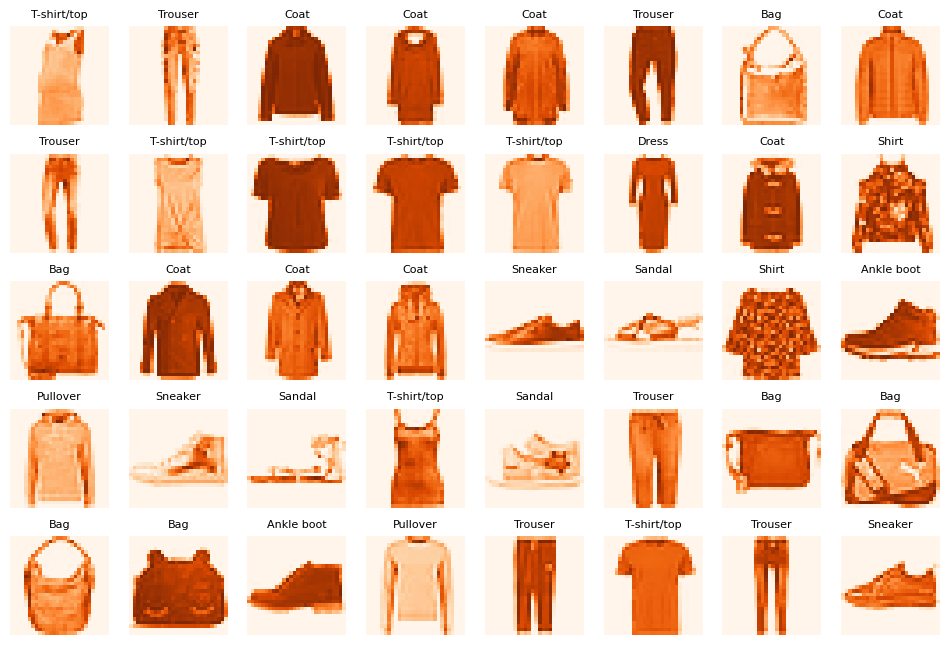

In [13]:
number_of_images = 40
f, ax = plt.subplots(5, 8, figsize=(12, 8))

for i, sample_index in enumerate(np.random.randint(1, x_test.shape[0], number_of_images)):
    test_image = x_test[sample_index].reshape(1, -1)
    test_item = y_test[sample_index]
    ax[i//8, i % 8].imshow(test_image[0].reshape((28, 28)), cmap="Oranges")
    ax[i//8, i % 8].axis('off')
    ax[i//8, i %
        8].set_title(f"{class_labels.get(test_item)}", fontsize=8)
plt.show()


# Побудова Архітектури нейронної мережі (моделі)

1. [Фуннкції активації](https://keras.io/api/layers/activations/)
2. [Оптимізатори](https://keras.io/api/optimizers/)
3. [Функції втрат](https://keras.io/api/losses/)
4. [Метрики](https://keras.io/api/metrics/)

In [14]:
# Побудова архітектури моделі
from tensorflow.keras.callbacks import LearningRateScheduler

keras.utils.set_random_seed(42)


def lr_scheduler(epoch, lr):
    new_lr = lr * 0.5
    return new_lr


lr_callback = LearningRateScheduler(lr_scheduler)

# Побудова архітектури моделі


def create_model(learning_rate):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1))),
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.1)),
    model.add(layers.Dense(64, activation='relu')),
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  )
    return model


# Гіперпараметри

Друге правило радіоаматора: не можна крутити дві ручки одночасно!

In [15]:
epochs = 25
steps_per_epoch = 1_000
batch_size = 64*2
learning_rate = 1e-3
model = create_model(learning_rate)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Навчання моделі

In [16]:
# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(256).prefetch(1)


# Навчання моделі
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test)
)

# Оцінка моделі на тестовому наборі даних
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'\nТочність на тестовому наборі: {test_accuracy:.2f}')


Epoch 1/25
469/469 [==============================] - 4s 5ms/step - loss: 0.5698 - accuracy: 0.8003 - val_loss: 0.4431 - val_accuracy: 0.8424
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 0.4010 - accuracy: 0.8557 - val_loss: 0.3976 - val_accuracy: 0.8581
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3596 - accuracy: 0.8700 - val_loss: 0.3717 - val_accuracy: 0.8629
Epoch 4/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3354 - accuracy: 0.8771 - val_loss: 0.3582 - val_accuracy: 0.8703
Epoch 5/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3184 - accuracy: 0.8838 - val_loss: 0.3673 - val_accuracy: 0.8657
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3042 - accuracy: 0.8876 - val_loss: 0.3457 - val_accuracy: 0.8726
Epoch 7/25
469/469 [==============================] - 2s 5ms/step - loss: 0.2920 - accuracy: 0.8913 - val_loss: 0.3356 - val_accuracy: 0.8782
Epoch 